
# TP Data Science - Partie B : Régression (California Housing)

**Objectif** : Prédire le prix médian des maisons (California Housing) à partir de variables explicatives, à l'aide de méthodes de régression.

## 1. Chargement : Partir du notebook Regression - California Housing.ipynb

In [ ]:
import sklearn
import pandas as pd

ds = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 2. Nettoyage et prétraitement : Imputez/supprimez les valeurs manquantes. Vérifiez unités et typages.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

print(df.isnull().sum())
print(df.dtypes)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


## 3. EDA : Statistiques descriptives, histogrammes, boxplots, scatter-plots prix vs variables clés, matrice de corrélation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


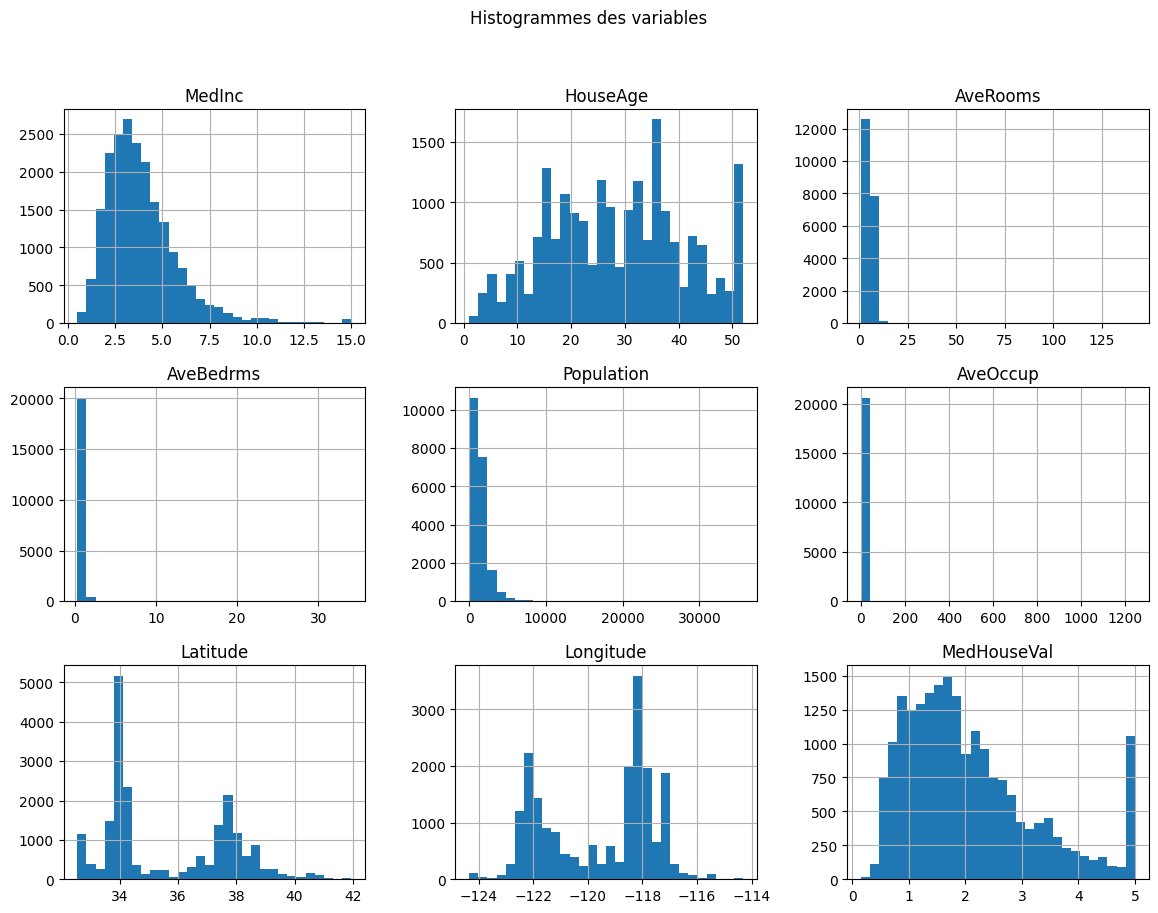

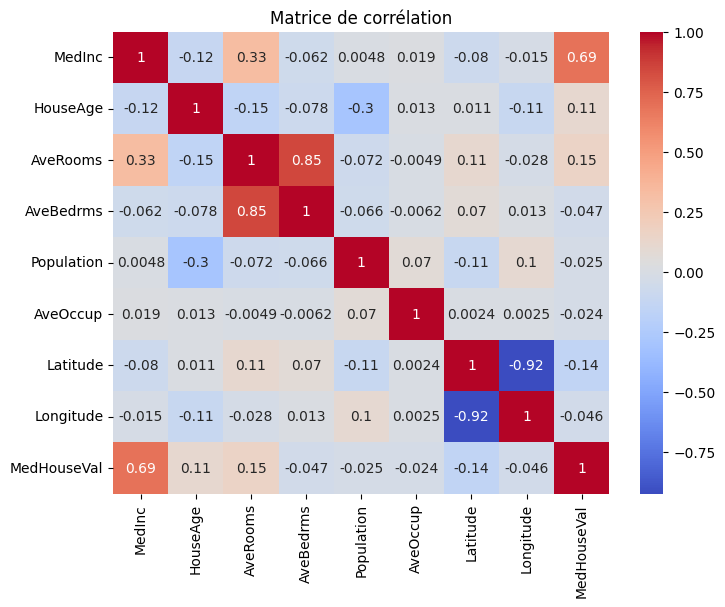

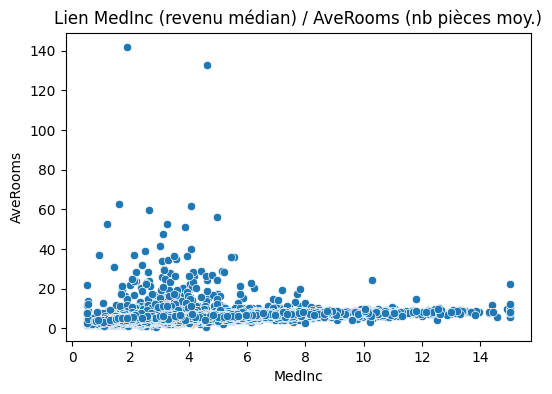

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques descriptives
display(df.describe())

# Histogrammes
df.hist(bins=30, figsize=(14,10))
plt.suptitle("Histogrammes des variables")
plt.show()

# Matrice de corrélation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# Scatter plot : MedInc vs AveRooms
plt.figure(figsize=(6,4))
sns.scatterplot(x='MedInc', y='AveRooms', data=df)
plt.title("Lien MedInc (revenu médian) / AveRooms (nb pièces moy.)")
plt.show()

## 4. Préparation des données (split, encodage, normalisation)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


target_col = "MedInc" 

train_set, temp_set = train_test_split(df, test_size=0.4, random_state=42)
valid_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

def preprocess(df, scaler=None, fit=True):
    df_num = df.drop([target_col], axis=1)

    if fit:
        scaler = StandardScaler().fit(df_num)
    X_num = scaler.transform(df_num)
    X = X_num
    y = df[target_col].values
    return X, y, scaler

X_train, y_train, scaler = preprocess(train_set, fit=True)
X_valid, y_valid, _ = preprocess(valid_set, scaler, fit=False)
X_test, y_test, _ = preprocess(test_set, scaler, fit=False)

print("Taille train :", X_train.shape, "Validation :", X_valid.shape, "Test :", X_test.shape)

Taille train : (12384, 8) Validation : (4128, 8) Test : (4128, 8)
